In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate


1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

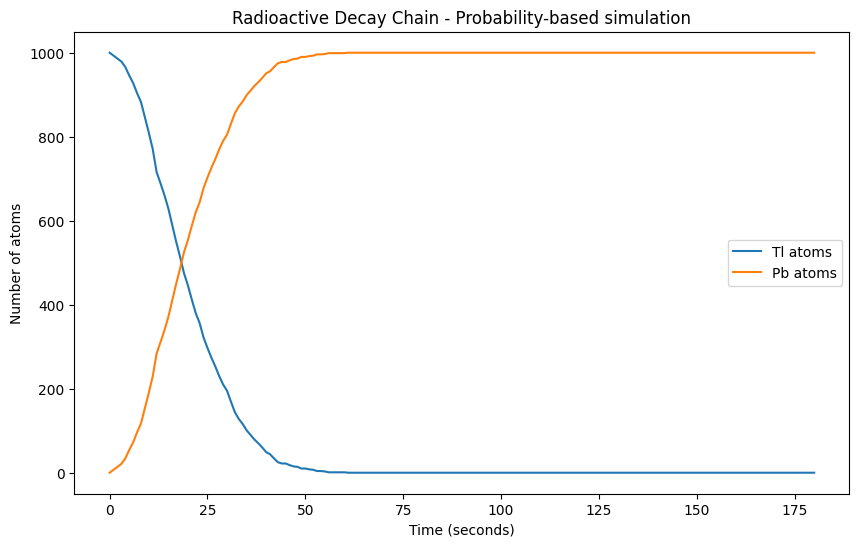

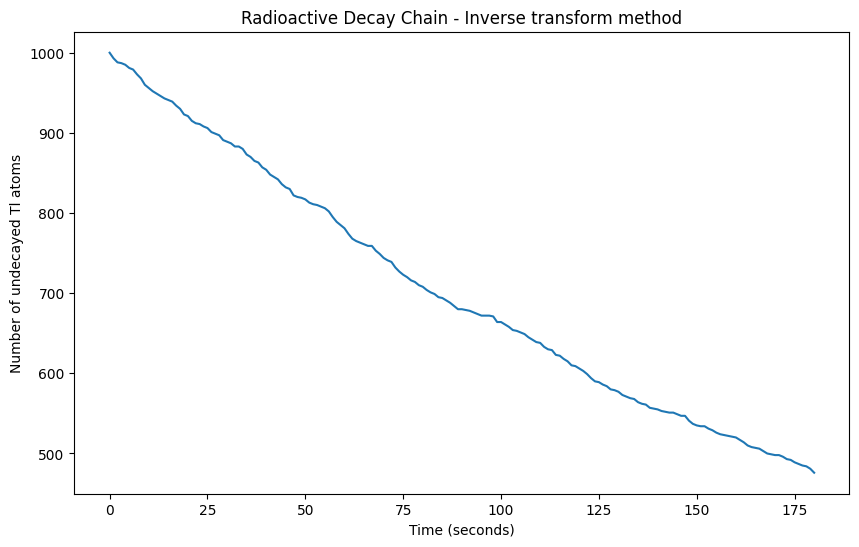

In [3]:
initial_Tl_atoms = 1000
initial_Pb_atoms = 0
tau = 3.052 * 60  # Half-life in seconds

# Method 1: Probability-based simulation
time_steps = 60 * 3  # Simulate for 3 minutes (60 seconds * 3 minutes)
Tl_atoms_prob = [initial_Tl_atoms]
Pb_atoms_prob = [initial_Pb_atoms]

for t in range(1, time_steps + 1):
    decay_prob = 1 - 2 ** (-t / tau)
    decayed_Tl = np.random.binomial(Tl_atoms_prob[-1], decay_prob)
    Tl_atoms_prob.append(Tl_atoms_prob[-1] - decayed_Tl)
    Pb_atoms_prob.append(Pb_atoms_prob[-1] + decayed_Tl)

# Plotting the probability-based simulation
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps + 1), Tl_atoms_prob, label='Tl atoms')
plt.plot(range(time_steps + 1), Pb_atoms_prob, label='Pb atoms')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.title('Radioactive Decay Chain - Probability-based simulation')
plt.legend()
plt.show()

# Method 2: Inverse transform method
time_steps = 60 * 3  # Simulate for 3 minutes (60 seconds * 3 minutes)

random_numbers = -tau * np.log(1 - np.random.rand(initial_Tl_atoms)) / np.log(2)
random_numbers.sort()

undecayed_Tl = [initial_Tl_atoms]
undecayed_count = initial_Tl_atoms
next_decay_idx = 0

for t in range(1, time_steps + 1):
    while next_decay_idx < initial_Tl_atoms and random_numbers[next_decay_idx] <= t:
        undecayed_count -= 1
        next_decay_idx += 1
    undecayed_Tl.append(undecayed_count)

time_decay = range(time_steps + 1)

# Plotting the inverse transform method simulation
plt.figure(figsize=(10, 6))
plt.plot(time_decay, undecayed_Tl)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of undecayed Tl atoms')
plt.title('Radioactive Decay Chain - Inverse transform method')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/Miss Method:
Estimated integral: 1.3465600000000002
Error (rescaled standard deviation): 0.0009148062089863615

Mean Value Method:
Estimated integral: 1.3457635242871702
Error (standard deviation): 0.021136271900723466


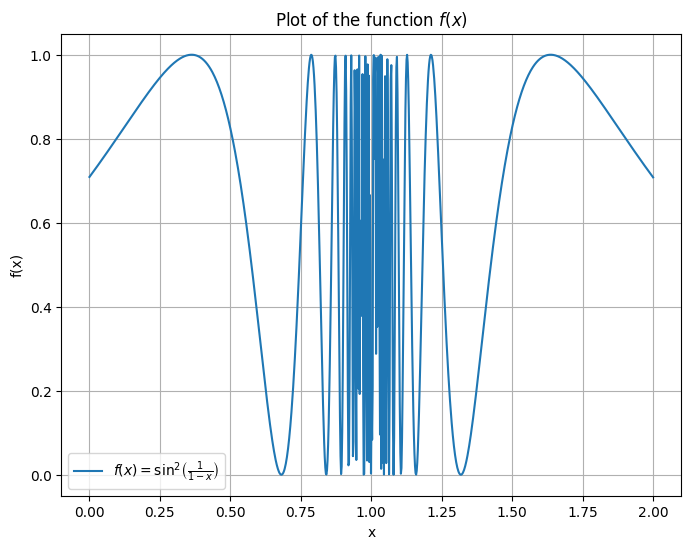

In [7]:
def f(x):
    return np.sin(1 / (1 - x))**2


x_values = np.linspace(0.001, 2, 1000)  # Avoiding division by zero at x=1
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = \\sin^2{\\left( \\frac{1}{1-x} \\right)}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x)$')
plt.legend()
plt.grid(True)

# Monte Carlo integration - Hit/Miss Method
def hit_miss_integration(N):
    integral_values = []
    for _ in range(N):
        random_points = np.random.uniform(0, 2, N)
        under_curve = sum(f(random_points) > np.random.uniform(0, 1, N))
        integral = under_curve / N * 2  # Scaling by the range of integration
        integral_values.append(integral)
    
    mean_integral = np.mean(integral_values)
    std_dev_integral = np.std(integral_values) / np.sqrt(N)  # Rescaled standard deviation
    return mean_integral, std_dev_integral

# Monte Carlo integration - Mean Value Method
def mean_value_integration(N):
    integral_values = []
    for _ in range(N):
        random_x = np.random.uniform(0, 2, N)
        integral = np.mean(f(random_x)) * 2  # Scaling by the range of integration
        integral_values.append(integral)
    
    mean_integral = np.mean(integral_values)
    std_dev_integral = np.std(integral_values)
    return mean_integral, std_dev_integral

N = 1000

# Hit/Miss Method
hit_miss_result = hit_miss_integration(N)
print("Hit/Miss Method:")
print(f"Estimated integral: {hit_miss_result[0]}")
print(f"Error (rescaled standard deviation): {hit_miss_result[1]}")

# Mean Value Method
mean_value_result = mean_value_integration(N)
print("\nMean Value Method:")
print(f"Estimated integral: {mean_value_result[0]}")
print(f"Error (standard deviation): {mean_value_result[1]}")

plt.show()


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [9]:
def inside_circle(x, y):
    return x**2 + y**2 <= 1

# Monte Carlo integration to estimate the area of the circle
def monte_carlo_circle(num_points):
    inside = 0
    for _ in range(num_points):
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        if inside_circle(x, y):
            inside += 1
    
    # Estimate area of the circle as the ratio of points inside to total points
    circle_area = (inside / num_points) * 4  # Multiplying by the area of the square (side length = 2)
    return circle_area

num_points = 1000000
estimated_area = monte_carlo_circle(num_points)
print(f"Estimated area of the unit circle: {estimated_area}")

# Function to check if point (x1, x2, ..., x10) is inside the 10D sphere
def inside_10d_sphere(*coordinates):
    radius_squared = sum(coord**2 for coord in coordinates)
    return radius_squared <= 1

# Monte Carlo integration to estimate the volume of the 10D sphere
def monte_carlo_10d_sphere(num_points):
    inside = 0
    for _ in range(num_points):
        coordinates = np.random.uniform(-1, 1, size=10)
        if inside_10d_sphere(*coordinates):
            inside += 1
    
    # Estimate volume of the 10D sphere as the ratio of points inside to total points
    sphere_volume = (inside / num_points) * (2**10)  # Multiplying by the volume of the hypercube (side length = 2)
    return sphere_volume

# Estimating the volume of the 10D unit sphere with 1 million points
num_points_10d = 1000000
estimated_volume_10d = monte_carlo_10d_sphere(num_points_10d)
print(f"Estimated volume of the 10D unit sphere: {estimated_volume_10d}")


Estimated area of the unit circle: 3.140968
Estimated volume of the 10D unit sphere: 2.48832


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [30]:
def f(x):
    return 1.0 / ((np.exp(x) + 1.0) * np.sqrt(x))

def w(x):
    return 0.5 / np.sqrt(x) #get wrong output if I use 1/sqrt(x)...

# Define the inverse function to transform random samples
def inv(x):
    return x * x

rng = np.random.default_rng()
N = 100000

# Generate random samples in the interval [0, 1)
x = rng.random(N)

# Transform the random samples using the inverse function
p = inv(x)

# Calculate the importance weights for the transformed samples
q = f(p) / w(p)

# Estimate the mean of the importance weights, which approximates the integral
monte_carlo_estimate = np.mean(q)
print("Monte Carlo solution with importance sampling:", monte_carlo_estimate)

# Calculate the true integral using scipy's quad function
true_integral, error_estimate = integrate.quad(f, 0, 1)
print("True integral value:", true_integral)
print("Estimated absolute error:", error_estimate)

Monte Carlo solution with importance sampling: 0.839553249443993
True integral value: 0.8389329600133858
Estimated absolute error: 2.0727863869751673e-13
